- datetime 형식을 잘 다루는게 핵심

In [2]:
# 2011년에 세워진 자전거 스타트업.
# 2011년부터 성장을 거듭함 (count가 성장하는 추세임)

In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

Description
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
   1: Clear, Few clouds, Partly cloudy, Partly cloudy
   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [42]:
train = pd.read_csv("data_bike/train.csv", parse_dates=['datetime'])

print(train.shape)
train.head(25)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [44]:
# null인 데이터 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

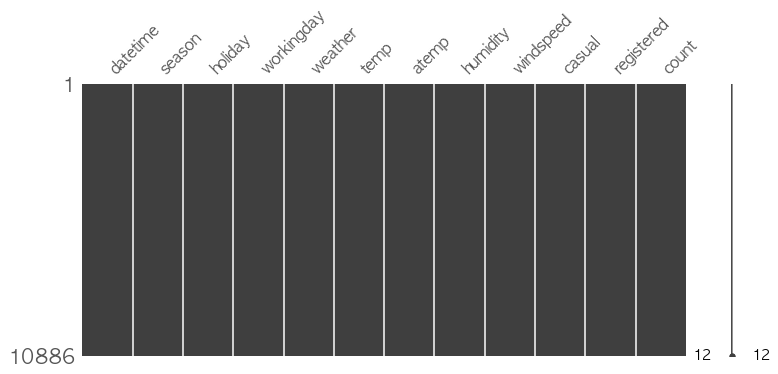

In [45]:
# null인 데이터 확인 - 시각화 
# pip install missingno
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [46]:
test = pd.read_csv('data_bike/test.csv', parse_dates=['datetime'])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [47]:
Categorical = ['season', 'holiday', 'workingday', 'weather']

for col in Categorical:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.6 KB


In [51]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [79]:
train['datetime'].dt.second

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [83]:
# '년월일시분초' -> '년/월/일/시/분/초/요일'로 열 추가
train['year'] = train['datetime'].dt.year            # 년
train['month'] = train['datetime'].dt.month          # 월
train['day'] = train['datetime'].dt.day              # 일
train['hour'] = train['datetime'].dt.hour            # 시
train['minute'] = train['datetime'].dt.minute        # 분
train['second'] = train['datetime'].dt.second        # 초
train['dayofweek'] = train['datetime'].dt.dayofweek  # 요일

print(train.shape)
train.head(3)

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5


In [81]:
# '년월일시분초' -> '년/월/일/시/분/초'로 열 추가
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

print(test.shape)

(6493, 16)


### windspeed가 0값인 것들은 0아닌 값들로 예측해서 집어넣기

In [84]:
# windspeed==0인 것, 0아닌 것 분리
train_wind_0 = train[train.windspeed==0]
print(train_wind_0.shape)

train_wind_not0 = train[train.windspeed!=0]
print(train_wind_not0.shape)

(1313, 19)
(9573, 19)


In [67]:
# windspeed가 0인 것들은 windspeed가 0이 아닌 것들로 예측해서 채워넣고 다시 데이터 합치기

In [85]:
feature_names_wnot0 = ['year','month','hour','season', 'weather', 'atemp', 'humidity']

In [86]:
X_train = train_wind_not0[feature_names_wnot0]
y_train = train_wind_not0['windspeed']

In [87]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
X_test = train_wind_0[feature_names_wnot0]
X_test.shape

(1313, 7)

In [89]:
train_wind_0['windspeed'] = model.predict(X_test)

In [90]:
train_wind_0[train_wind_0['windspeed']==0]
# windspeed==0인 것들은 없음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek


In [91]:
train = pd.concat([train_wind_0, train_wind_not0], axis=0).sort_values(by='datetime')

In [92]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,11.200792,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,10.271301,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,9.956166,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,8.613671,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,8.387653,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12,117,129,2012,12,19,22,0,0,2


### test 셋도 windspeed가 0인것 예측해서 집어넣기

In [93]:
# windspeed==0인 것, 0아닌 것 분리
test_wind_0 = test[test.windspeed==0]
print(test_wind_0.shape)

test_wind_not0 = test[test.windspeed!=0]
print(test_wind_not0.shape)

(867, 16)
(5626, 16)


In [94]:
X_test = test_wind_0[feature_names_wnot0]
test_wind_0['windspeed'] = model.predict(X_test)

In [95]:
test_wind_0[test_wind_0['windspeed']==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek


In [96]:
test = pd.concat([test_wind_0, test_wind_not0], axis=0).sort_values(by='datetime')

In [97]:
print(test.shape)
test

(6493, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,9.539527,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,9.419731,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.001400,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.001400,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.001400,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.998100,2012,12,31,22,0,0,0


## EDA

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

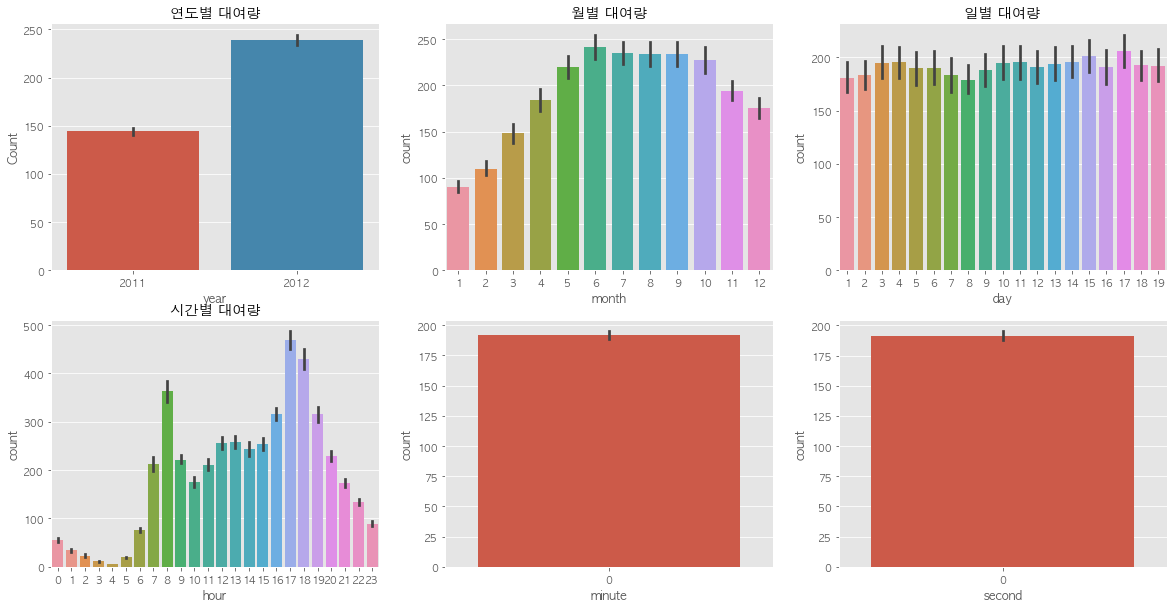

In [25]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
from matplotlib import font_manager, rc
import platform
rc('font', family='AppleGothic')

# 년월일시분초 barplot 그려보기
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)  # 테이블위치 ax1~ax6 지정
figure.set_size_inches(20,10)
sns.barplot(data=train, x='year', y='count', ax=ax1)   # 년
sns.barplot(data=train, x='month', y='count', ax=ax2)  # 월
sns.barplot(data=train, x='day', y='count', ax=ax3)    # 일
sns.barplot(data=train, x='hour', y='count', ax=ax4)   # 시
sns.barplot(data=train, x='minute', y='count', ax=ax5) # 분
sns.barplot(data=train, x='second', y='count', ax=ax6) # 초

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

- 연도별 대여량은 2011년 보다 2012년이 더 많다.
- 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
- 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
- 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.
- 분, 초는 다 0이기 때문에 의미가 없다.

=> feature로 쓸만한게 year, month, hour (day, minute, second는 버림)

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

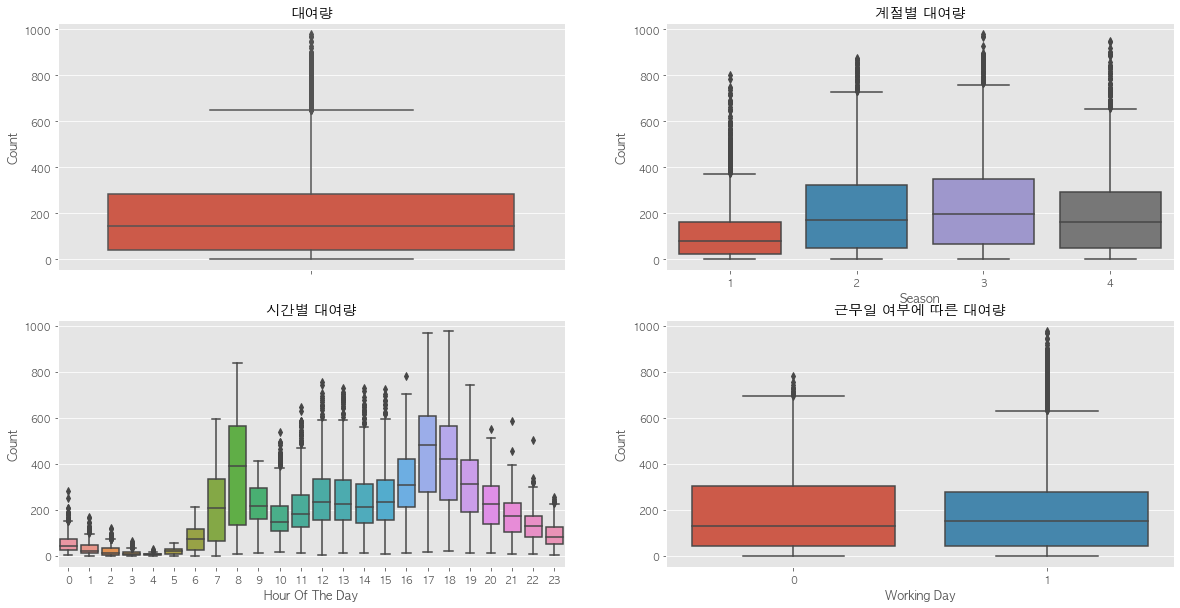

In [26]:
# 박스플랏 그려보자
figure, axis = plt.subplots(nrows=2, ncols=2)          # 테이블 위치 (2, 2) 지정
figure.set_size_inches(20, 10)
sns.boxplot(data=train, y='count', ax=axis[0][0])                     # 대여량 전체
sns.boxplot(data=train, y='count', x='season', ax=axis[0][1])         
sns.boxplot(data=train, y='count', x='hour', ax=axis[1][0])
sns.boxplot(data=train, y='count', x='workingday', ax=axis[1][1])

# 라벨 달기
axis[0][0].set(ylabel='Count',title="대여량")
axis[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
axis[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
axis[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")

=> 봄, 겨울보다 여름이나 가을이 더 많이 자전거를 탄다.

=> 8시, 17시, 18시가 가장 많이 자전거를 탄다.

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

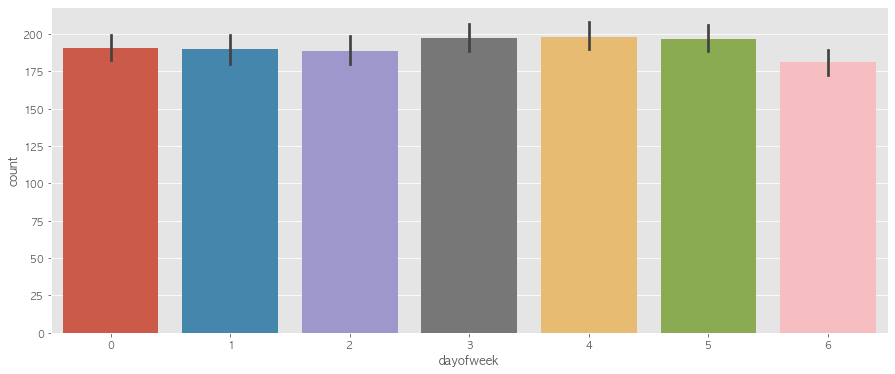

In [98]:
# 요일별 그래프 그려보기
plt.figure(figsize=(15,6))
sns.barplot(data=train, x='dayofweek', y='count')
# => 요일은 큰 의미 없어보이는데...

### 휴일, 요일, 날씨, 계절 별 - 시간 그래프

<AxesSubplot:xlabel='hour', ylabel='count'>

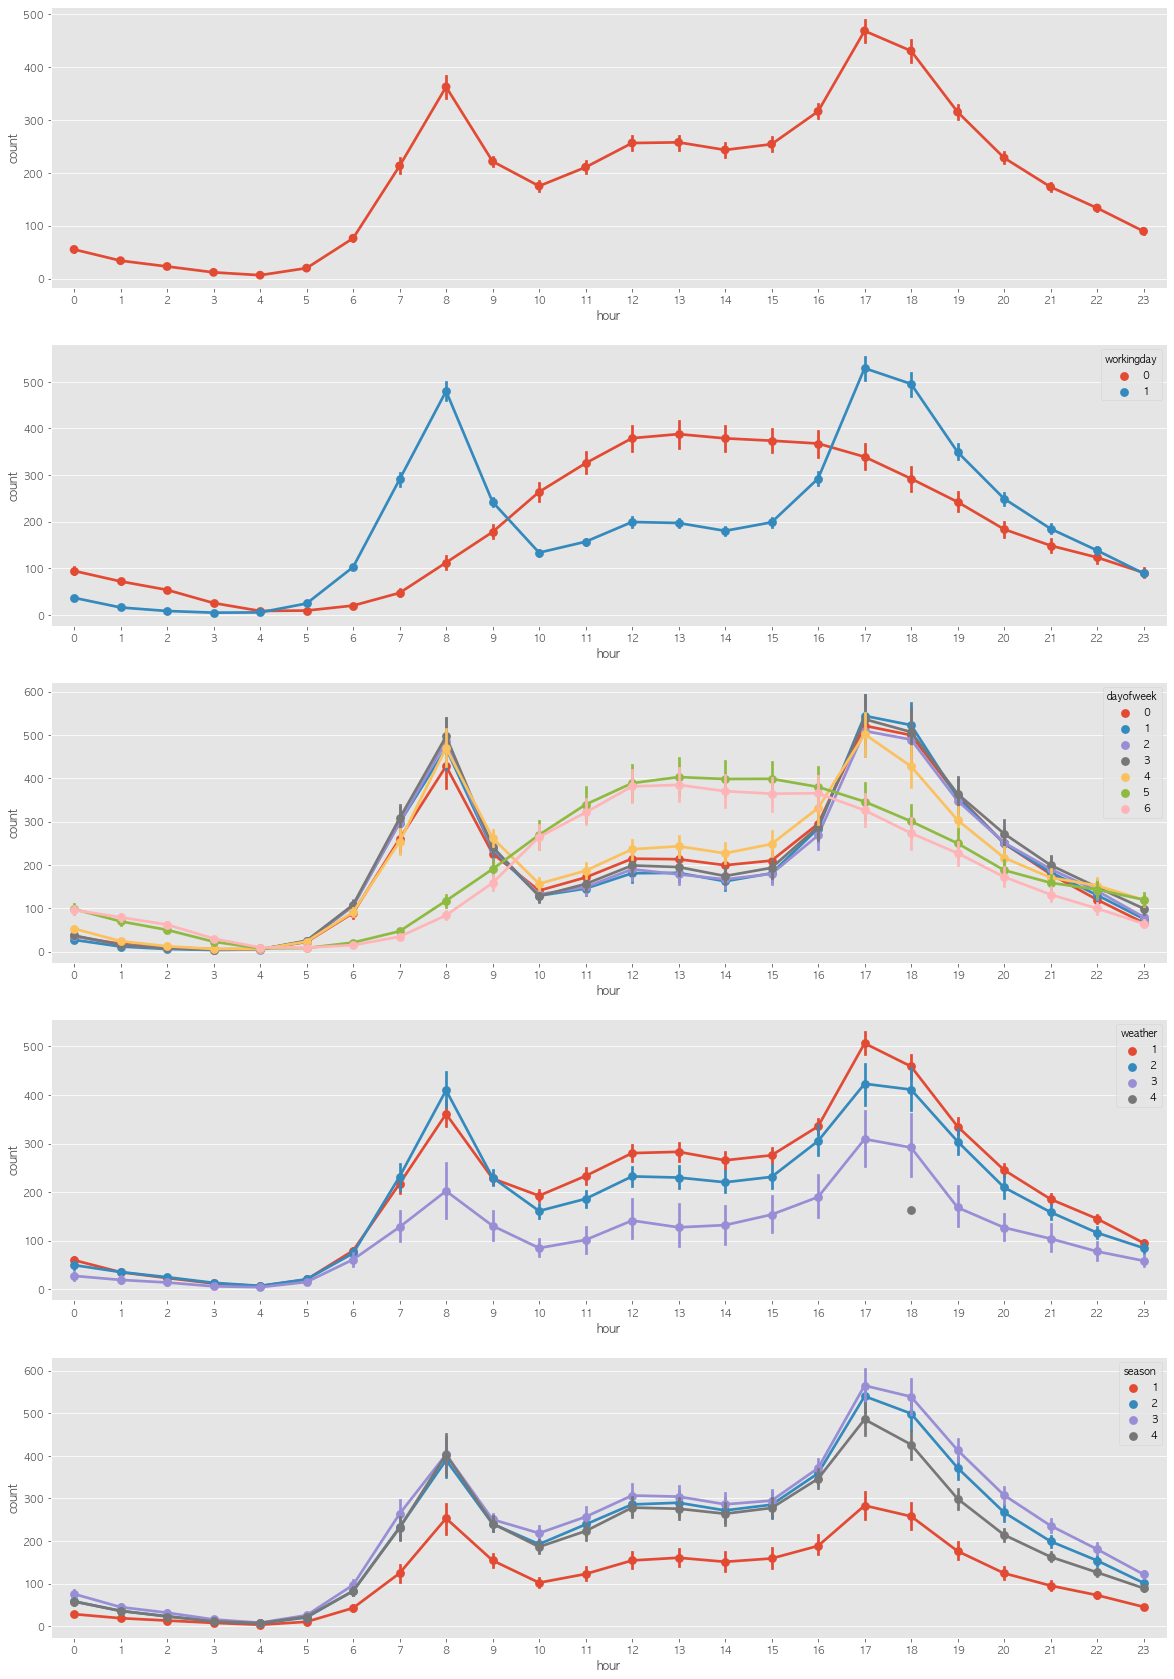

In [28]:
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
figure.set_size_inches(20, 30)
sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

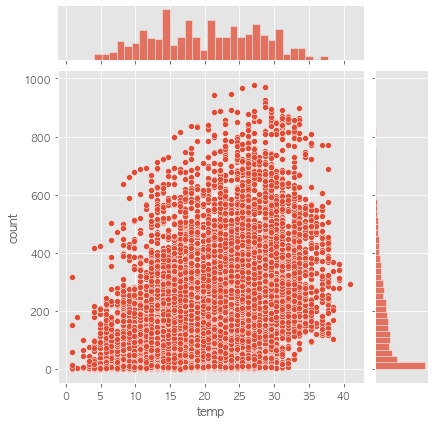

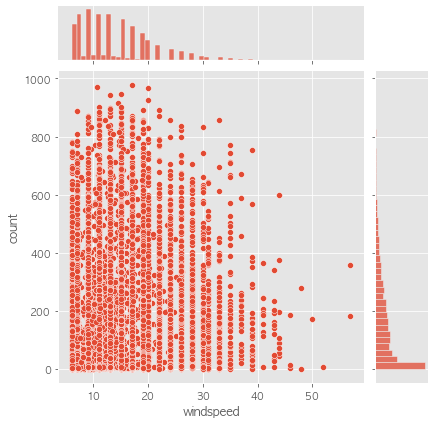

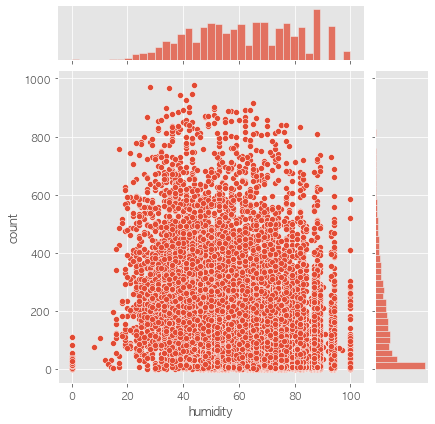

In [99]:
sns.jointplot(data=train, x='temp', y='count')
sns.jointplot(data=train, x='windspeed', y='count')
sns.jointplot(data=train, x='humidity', y='count')

count와
- temp는 양의 상관관계가 있어 보임
- windspeed는 음의 상관관계가 있어 보임
- humidity는 음의 상관관계가 있어 보임

#### pairplot으로 그리면 한번에 그려줘서 편함

In [100]:
train.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

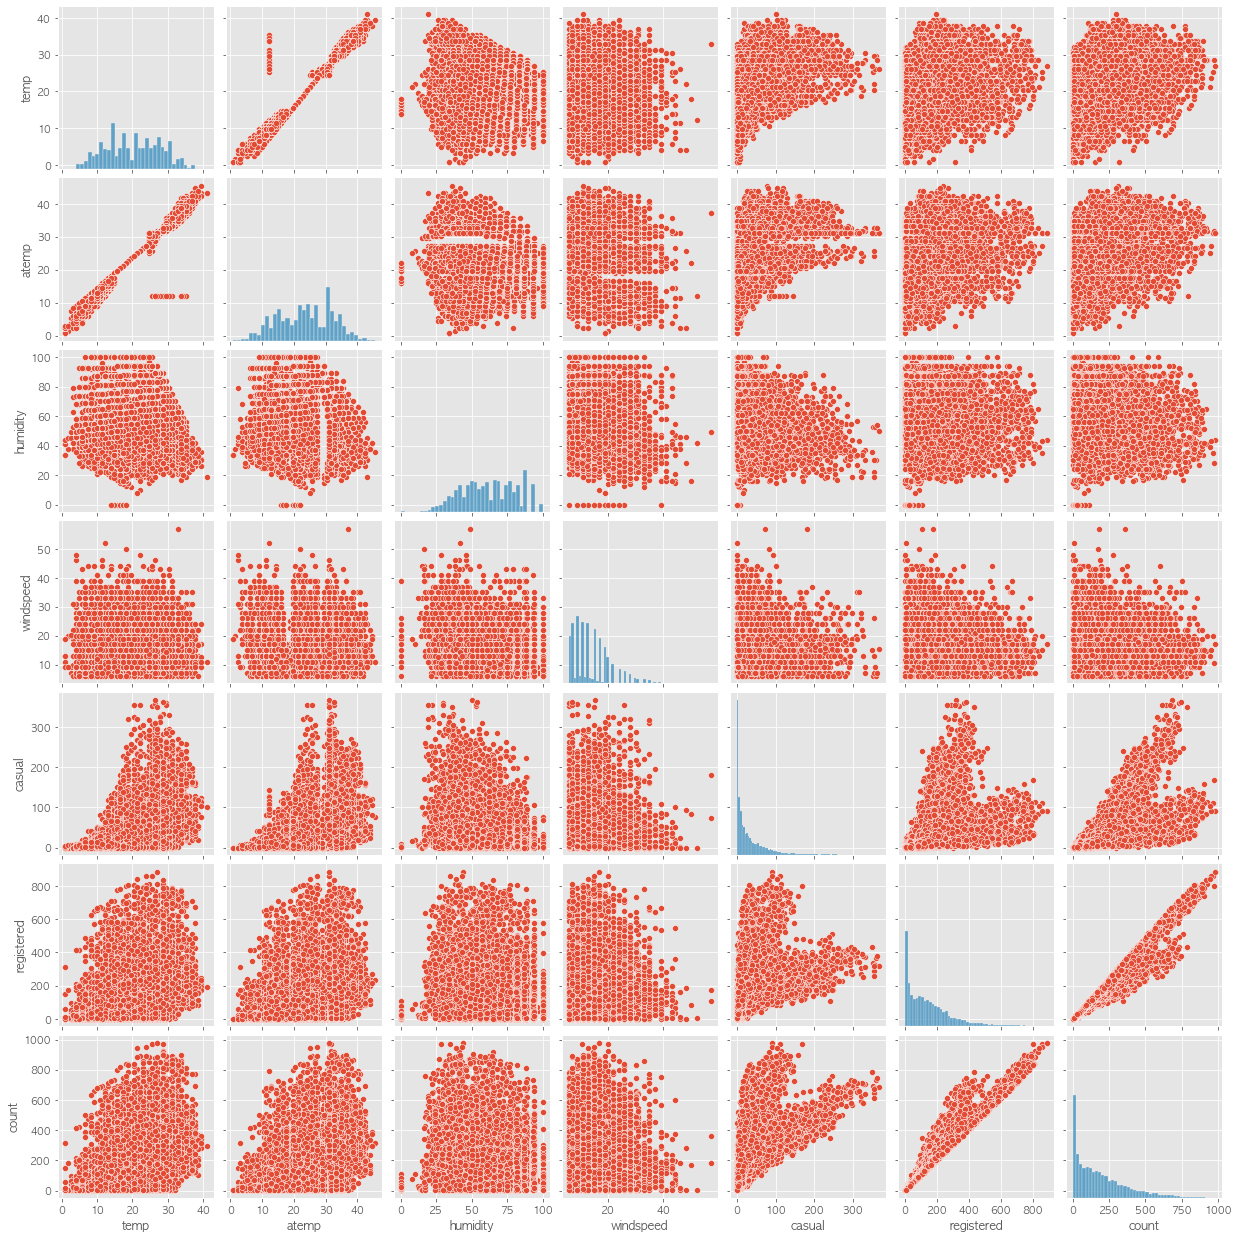

In [101]:
sns.pairplot(train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])

<AxesSubplot:>

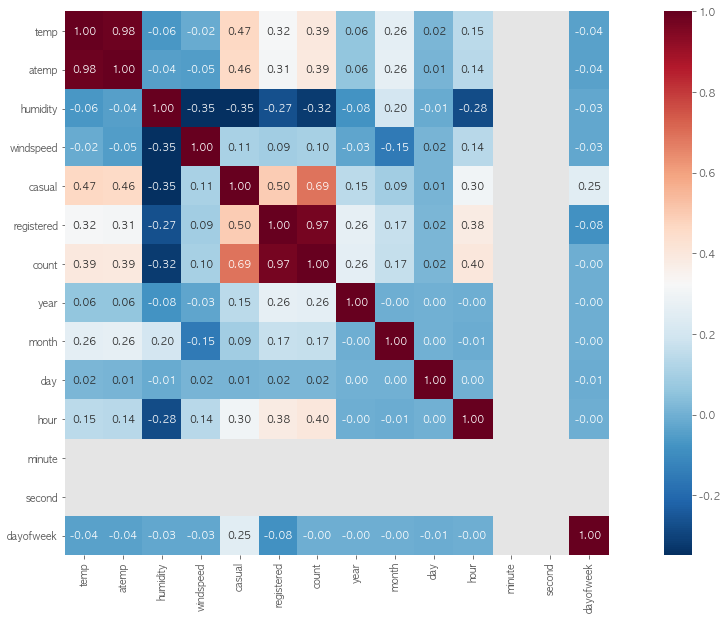

In [103]:
# 히트맵도 한번 그려보자
fig=plt.gcf()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), cmap='RdBu_r', square=True, cbar=True, annot=True, fmt=".2f")

=> 날씨, 시간 등이 count에 영향을 미친다

### 년월을 이어서 그래프 그리기

In [104]:
# 2011년~2012년 year와 month를 합쳐서 그래프를 그려보자
# datetime을 넣으면 년월 형식으로 변환해주는 함수
def year_month(datetime):
    return str(datetime.year)+"-"+str(datetime.month)

train['year_month'] = train['datetime'].apply(year_month)

In [105]:
train[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [106]:
test['year_month'] = test['datetime'].apply(year_month)

<AxesSubplot:xlabel='year_month', ylabel='count'>

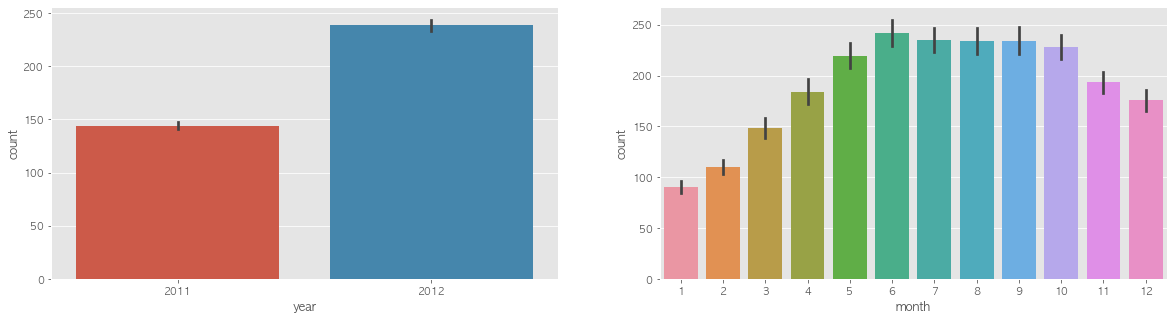

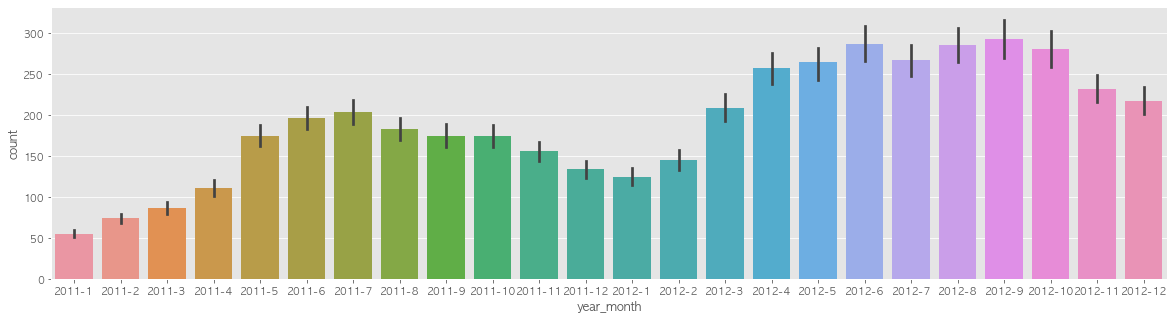

In [36]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20,5)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,5)
sns.barplot(data=train, x='year_month', y='count', ax=ax3)

- 기업 성장세로 점점 증가하는 것 -> 연도_월 합쳐서 feature로 사용해야 할듯

### 종속변수인 'count'가 right-skew되어있다.(정규분포 아니다) -> 이상적인 예측모델은 아니다.

In [108]:
# 정규화 해주기
train['log_count'] = np.log(train['count'] + 1)

<AxesSubplot:xlabel='count', ylabel='Density'>

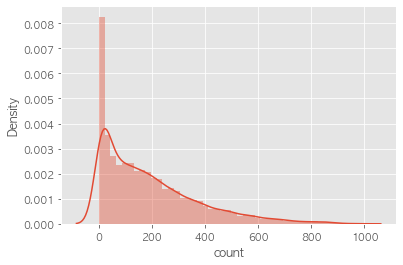

In [109]:
sns.distplot(train['count'])

<AxesSubplot:xlabel='log_count', ylabel='Density'>

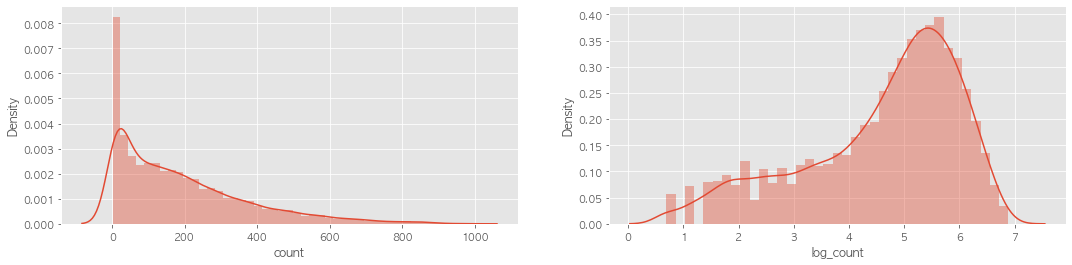

In [110]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.distplot(train['count'], ax=ax1)
sns.distplot(train['log_count'], ax=ax2)

In [111]:
train['count_recover'] = np.exp(train['log_count']) - 1
train[['count', 'log_count', 'count_recover']].head()

,count,log_count,count_recover
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


## => EDA 종료